- Bibliotecas

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import plotly.express as px
import numpy as np
import seaborn as sn

- Conhecendo os Dados

In [60]:
df = pd.read_csv('dados_clima_recife_2005_2021.csv', sep = ',')
df['Data'] = pd.to_datetime(df['Data'])


In [61]:
df.shape

(2598, 6)

In [62]:
df.dtypes

Data                 datetime64[ns]
Prec_Total_Diária           float64
Temp_Max_Diária             float64
Temp_Med_Diária             float64
Temp_Min_Diária             float64
Vento_Med_Diária            float64
dtype: object

In [63]:
df.head().round(1)

,Data,Prec_Total_Diária,Temp_Max_Diária,Temp_Med_Diária,Temp_Min_Diária,Vento_Med_Diária
0,2005-01-02,0.0,31.3,27.2,21.6,2.4
1,2005-01-03,0.0,31.2,27.8,25.3,3.0
2,2005-01-06,0.0,30.7,26.1,20.1,2.6
3,2005-01-07,0.0,31.1,26.0,20.4,1.8
4,2005-01-08,5.0,31.6,26.7,22.2,2.1


- Estatística descritiva da base

In [64]:
df.iloc[:, 1:6].describe().round(2)



,Prec_Total_Diária,Temp_Max_Diária,Temp_Med_Diária,Temp_Min_Diária,Vento_Med_Diária
count,2598.00,2598.00,2598.00,2598.00,2598.00
mean,3.88,30.44,26.06,22.47,1.69
std,11.76,1.61,1.33,1.55,0.57
min,0.00,24.00,21.95,17.50,0.00
25%,0.00,29.20,25.10,21.40,1.33
50%,0.00,30.70,26.27,22.40,1.67
75%,2.00,31.60,27.10,23.50,2.03
max,151.00,35.20,29.01,27.20,3.69


2005 e 2021

In [65]:
selecao_2005 = (df['Data'] >= '2005-01-01') & (df['Data'] <= '2005-12-31')
df_filtrado = df[selecao_2005]
df_filtrado.iloc[:, 1:6].describe().round(2)

,Prec_Total_Diária,Temp_Max_Diária,Temp_Med_Diária,Temp_Min_Diária,Vento_Med_Diária
count,211.00,211.00,211.00,211.00,211.00
mean,4.83,30.05,26.19,22.64,2.07
std,14.62,1.74,1.52,1.80,0.56
min,0.00,25.00,22.52,18.50,0.71
25%,0.00,28.80,24.94,21.35,1.71
50%,0.00,30.00,26.22,22.70,2.09
75%,3.00,31.55,27.47,23.80,2.49
max,130.00,33.40,29.01,27.20,3.23


In [66]:
selecao_2021 = (df['Data'] >= '2021-01-01') & (df['Data'] <= '2021-12-31')
df_filtrado = df[selecao_2021]
df_filtrado.iloc[:, 1:6].describe().round(2)

,Prec_Total_Diária,Temp_Max_Diária,Temp_Med_Diária,Temp_Min_Diária,Vento_Med_Diária
count,154.00,154.00,154.00,154.00,154.00
mean,5.92,30.56,26.05,22.67,1.41
std,18.21,1.79,1.42,1.39,0.35
min,0.00,25.00,22.68,19.50,0.70
25%,0.00,29.02,24.82,22.00,1.11
50%,0.00,30.80,26.23,22.75,1.40
75%,3.00,32.00,27.20,23.60,1.67
max,135.80,34.40,28.73,26.40,2.43


- Frequência das variáveis

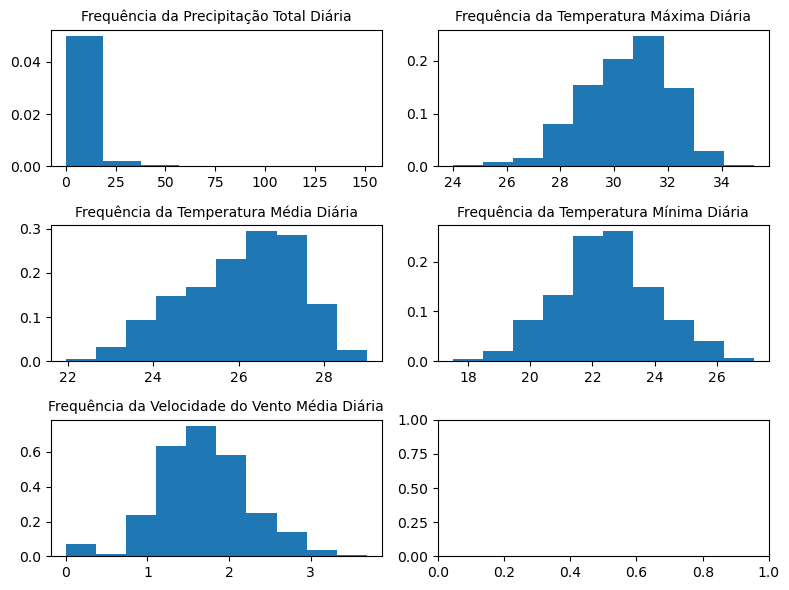

In [67]:
fig, axs = plt.subplots(3, 2, figsize = (8,6))

axs[0, 0].hist(df.Prec_Total_Diária, 8, density=True)
axs[0, 0].set_title('Frequência da Precipitação Total Diária', fontsize = 10)

axs[0, 1].hist(df.Temp_Max_Diária, 10, density=True)
axs[0, 1].set_title('Frequência da Temperatura Máxima Diária', fontsize = 10)

axs[1, 0].hist(df.Temp_Med_Diária, 10, density=True)
axs[1, 0].set_title('Frequência da Temperatura Média Diária', fontsize = 10)

axs[1, 1].hist(df.Temp_Min_Diária, 10, density=True)
axs[1, 1].set_title('Frequência da Temperatura Mínima Diária', fontsize = 10)

axs[2, 0].hist(df.Vento_Med_Diária, 10, density=True)
axs[2, 0].set_title('Frequência da Velocidade do Vento Média Diária', fontsize = 10)

fig.tight_layout()
plt.show()

- Variação temporal

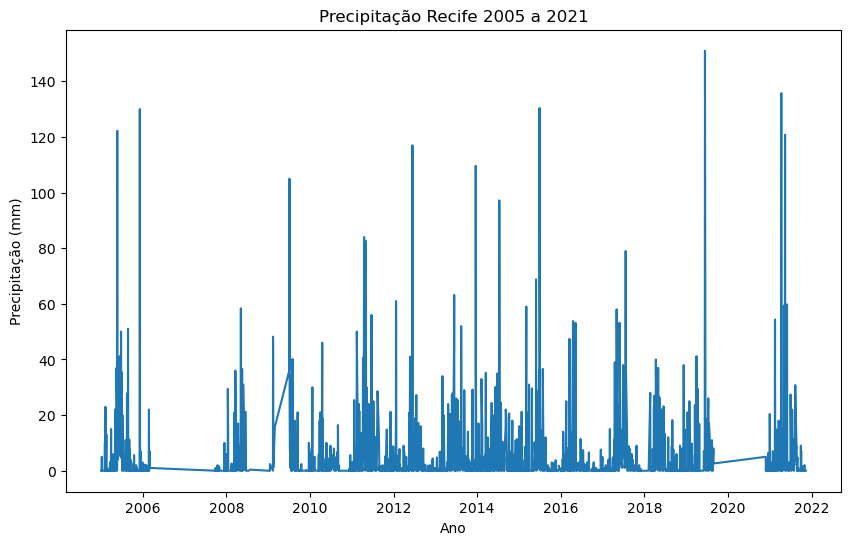

In [68]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(df.Data, df.Prec_Total_Diária)
ax.xaxis.set_major_locator(YearLocator(2))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

ax.set_title('Precipitação Recife 2005 a 2021', fontsize = 12)
ax.set_ylabel('Precipitação (mm)', fontsize = 10)
ax.set_xlabel('Ano', fontsize = 10)

plt.show()

- Dias mais chuvosos, quentes e frios

In [69]:
filtro = df.nlargest(10, 'Prec_Total_Diária')
filtro.round(1)

,Data,Prec_Total_Diária,Temp_Max_Diária,Temp_Med_Diária,Temp_Min_Diária,Vento_Med_Diária
2396,2019-06-14,151.0,29.6,25.8,22.1,1.6
2499,2021-04-11,135.8,29.0,24.7,23.1,1.0
1669,2015-06-29,130.4,29.2,24.5,21.0,1.4
195,2005-12-06,130.0,28.2,25.8,22.5,1.8
92,2005-05-23,122.2,29.0,24.5,21.6,0.7
2513,2021-05-14,120.8,27.0,24.0,22.6,0.8
1038,2012-06-14,117.0,27.9,23.9,21.7,1.8
1346,2013-12-19,109.6,27.0,23.9,22.4,1.0
444,2009-07-06,105.0,25.9,23.0,21.4,1.2
1464,2014-07-13,97.2,27.0,23.5,21.1,1.4


In [70]:
filtro = df.nlargest(10, 'Temp_Max_Diária')
filtro.round(1)

,Data,Prec_Total_Diária,Temp_Max_Diária,Temp_Med_Diária,Temp_Min_Diária,Vento_Med_Diária
1520,2014-11-12,3.0,35.2,26.3,21.8,1.4
2371,2019-03-22,0.0,35.0,28.6,24.0,1.2
2370,2019-03-21,0.0,34.6,28.6,24.1,1.6
1123,2012-11-20,0.0,34.5,26.9,23.2,2.1
2592,2021-11-05,0.0,34.4,28.0,22.8,1.7
365,2008-02-28,0.0,34.3,27.9,23.1,2.6
2593,2021-11-06,0.0,34.3,27.8,22.4,1.7
1225,2013-04-17,0.0,34.1,27.3,21.7,1.4
578,2010-03-07,0.0,34.0,28.4,23.2,1.8
2139,2017-12-08,0.0,34.0,27.3,21.9,1.8


In [71]:
filtro = df.nsmallest(10, 'Temp_Min_Diária')
filtro.round(1)

,Data,Prec_Total_Diária,Temp_Max_Diária,Temp_Med_Diária,Temp_Min_Diária,Vento_Med_Diária
419,2008-06-21,0.0,27.4,21.9,17.5,1.4
1011,2012-04-28,0.0,31.4,24.3,17.8,1.5
1879,2016-07-22,0.0,28.6,23.1,17.9,1.2
2076,2017-08-15,0.0,29.4,23.0,17.9,1.2
654,2010-09-06,0.2,28.2,23.1,18.0,1.7
1888,2016-08-09,0.0,28.9,22.5,18.2,1.2
1889,2016-08-12,0.0,29.0,23.7,18.2,1.5
1891,2016-08-14,0.0,29.1,23.2,18.2,1.1
1089,2012-09-30,0.0,29.0,23.8,18.3,1.8
646,2010-08-15,0.0,28.3,23.0,18.4,1.4


- Correlação

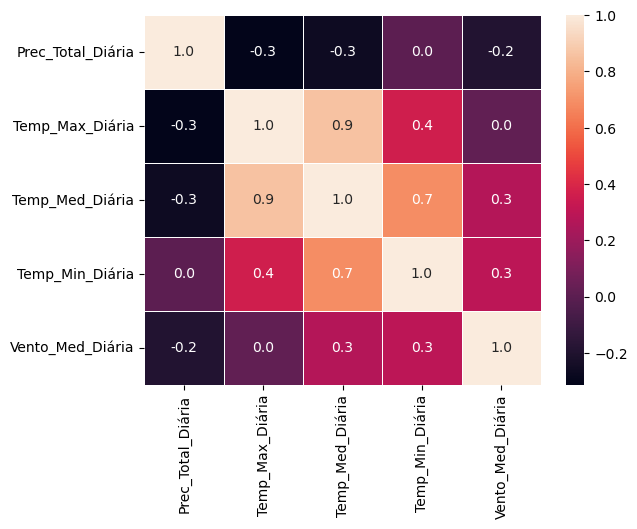

In [72]:
corre = df.iloc[:, 1:6].corr()
mapa_calor = sn.heatmap(corre, annot = True, fmt=".1f", linewidths=.6)
mapa_calor

plt.show()

- Tendências

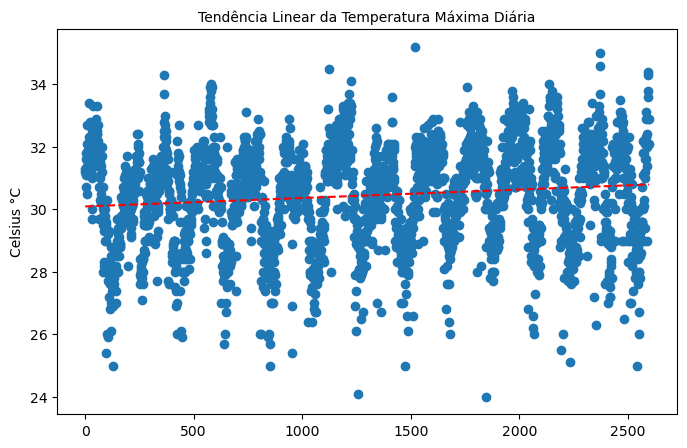

In [74]:
x = df.index
y = df.Temp_Max_Diária

fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(x,y)
ax.set_title('Tendência Linear da Temperatura Máxima Diária', fontsize = 10)
ax.set_ylabel('Celsius °C', fontsize = 10)

#plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

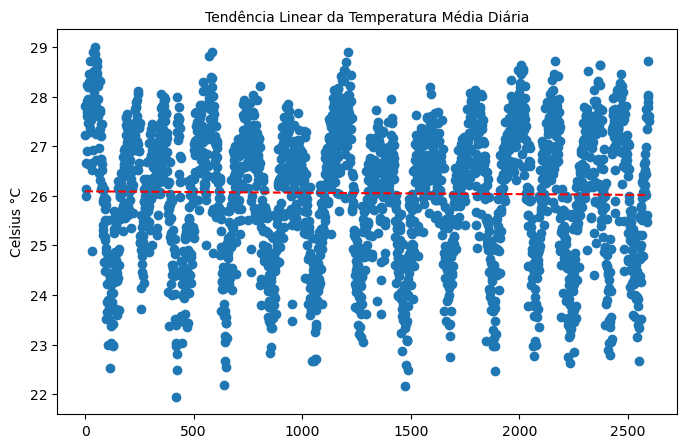

In [75]:
x = df.index
y = df.Temp_Med_Diária

fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(x,y)
ax.set_title('Tendência Linear da Temperatura Média Diária', fontsize = 10)
ax.set_ylabel('Celsius °C', fontsize = 10)

#plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

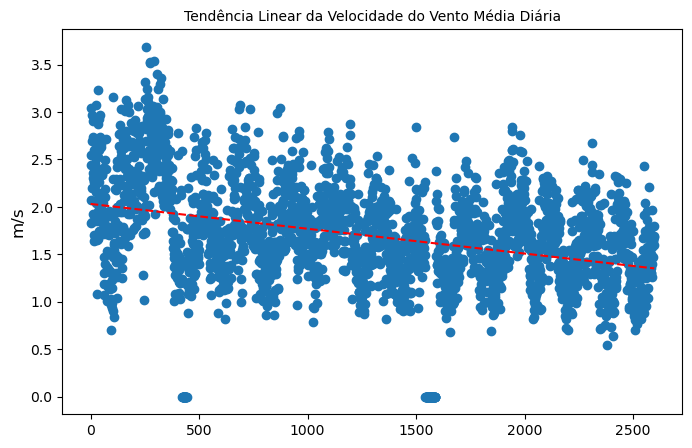

In [76]:
x = df.index
y = df.Vento_Med_Diária

fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(x,y)
ax.set_title('Tendência Linear da Velocidade do Vento Média Diária', fontsize = 10)
ax.set_ylabel('m/s', fontsize = 12)


#plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()